### Homework Rakamin Trial Class - Mini Case

# Mengukur Performa Penjualan Ritel Online

## Load Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [6]:
df_dataset = pd.read_csv('/content/online_retail_II .csv')

In [7]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [8]:
df_dataset.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [9]:
df_dataset.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [10]:
df_dataset.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


# Section 1

### Create New Feature: Year

In [11]:
df_dataset['InvoiceDate'] = pd.to_datetime(df_dataset['InvoiceDate'])
df_dataset['InvoiceDate']

0         2009-12-01 07:45:00
1         2009-12-01 07:45:00
2         2009-12-01 07:45:00
3         2009-12-01 07:45:00
4         2009-12-01 07:45:00
                  ...        
1067366   2011-12-09 12:50:00
1067367   2011-12-09 12:50:00
1067368   2011-12-09 12:50:00
1067369   2011-12-09 12:50:00
1067370   2011-12-09 12:50:00
Name: InvoiceDate, Length: 1067371, dtype: datetime64[ns]

In [12]:
df_dataset['year'] = pd.DatetimeIndex(df_dataset['InvoiceDate']).year
df_dataset['year']

0          2009
1          2009
2          2009
3          2009
4          2009
           ... 
1067366    2011
1067367    2011
1067368    2011
1067369    2011
1067370    2011
Name: year, Length: 1067371, dtype: int64

### Filtering Data

In [13]:
sales = df_dataset[(df_dataset['Quantity'] >= 1) & (-df_dataset['Invoice'].str.contains('C',regex=True))]
sales

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


## Revenue

In [14]:
sales[['Quantity','Price']].head()

,Quantity,Price
0,12,6.95
1,12,6.75
2,12,6.75
3,48,2.10
4,24,1.25


In [15]:
sales['Revenue'] = (sales['Quantity']) * (sales['Price'])

In [16]:
sales['Revenue'].reset_index()

,index,Revenue
0,0,83.40
1,1,81.00
2,2,81.00
3,3,100.80
4,4,30.00
...,...,...
1044415,1067366,12.60
1044416,1067367,16.60
1044417,1067368,16.60
1044418,1067369,14.85


### Average of Revenue per Year

In [17]:
sales['Revenue'].mean()

19.92868618754907

In [18]:
sales.groupby('year')['Revenue'].mean().reset_index()

,year,Revenue
0,2009,18.713273
1,2010,19.908987
2,2011,20.058767


### Interpretation

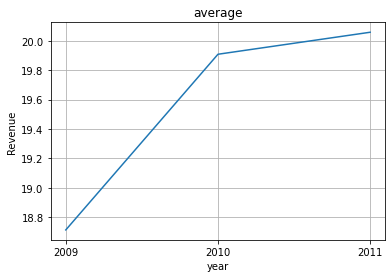

In [19]:
x = ["2009",'2010','2011']
y = [18.713273,19.908987,20.058767]
plt.plot(x, y)

plt.xlabel('year')
plt.ylabel('Revenue')

plt.title('average')
plt.grid(True)

plt.show()

In [20]:
#pera = percentage keinakan yang terjadi pada tahun 2009 - 2010
pera= (19.908987-18.713273)/18.713273
pera

0.06389657223511883

In [21]:
#perb = percentage keinakan yang terjadi pada tahun 2009 - 2010
perb=(20.058767-19.908987)/19.908987
perb

0.007523235612138367

There was a significant increase in revenue from 2009 to 2010 by 6.4%. whereas in 2010 to 2011 only 0.75%.

# Section 2

### Filtering Data 

### Customers who finished their purchases



In [22]:
finished = df_dataset[(df_dataset['Quantity'] >= 1) & (-df_dataset['Invoice'].str.contains('C',regex=True))]
finished 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


In [23]:
Cust_notna=finished[finished['Customer ID'].notna()]
Cust_notna

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


#### finished transaction each year

In [24]:
# Number of Finished Transaction
sfinished = Cust_notna['Invoice'].count()
sfinished 

805620

In [25]:
Cust_notna.groupby('year')['Invoice'].count().reset_index()

,year,Invoice
0,2009,30761
1,2010,403094
2,2011,371765


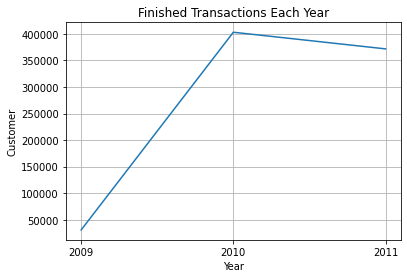

In [26]:
x = ["2009",'2010','2011']
y = [30761,403094,371765]
plt.plot(x, y)

plt.xlabel('Year')
plt.ylabel('Customer')

plt.title('Finished Transactions Each Year')
plt.grid(True)

plt.show()


## Customers who canceled their purchases

In [27]:
cancel= df_dataset[ df_dataset['Invoice'].str.contains('C',regex=True)]
cancel

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011


### Canceled Transactions Each Year

In [28]:
# Number of Canceled Transactions
scancel = cancel['Invoice'].count()
scancel

19494

In [29]:
cancel.groupby('year')['Invoice'].count().reset_index() 

,year,Invoice
0,2009,1015
1,2010,9919
2,2011,8560


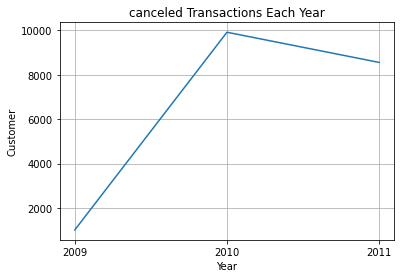

In [31]:
x = ["2009",'2010','2011']
y = [1015,9919,8560]
plt.plot(x, y)

plt.xlabel('Year')
plt.ylabel('Customer')

plt.title('canceled Transactions Each Year')
plt.grid(True)

plt.show()

## **Interpretation**

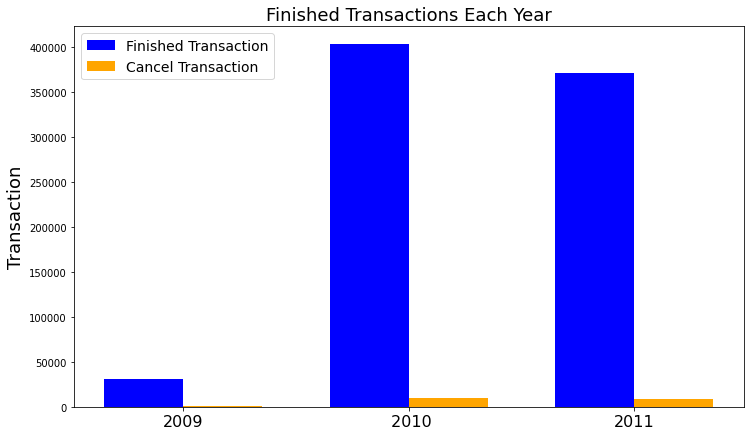

In [32]:
%matplotlib inline
Tahun = ['2009', ' 2010', '2011']
Finished = [30761,403094,371765]
Cancel = [1015,9919,8560]

x = np.arange(len(Tahun))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))

Fins = ax.bar(x - width/2, Finished, width, label='Finished Transaction', color='Blue')
Canc = ax.bar(x + width/2, Cancel, width, label='Cancel Transaction', color='Orange')

ax.set_title('Finished Transactions Each Year', size=18)
ax.set_ylabel('Transaction', size=18)
ax.set_xticks(x)
ax.set_xticklabels(Tahun, size=16)
ax.legend(fontsize=14)

plt.show()

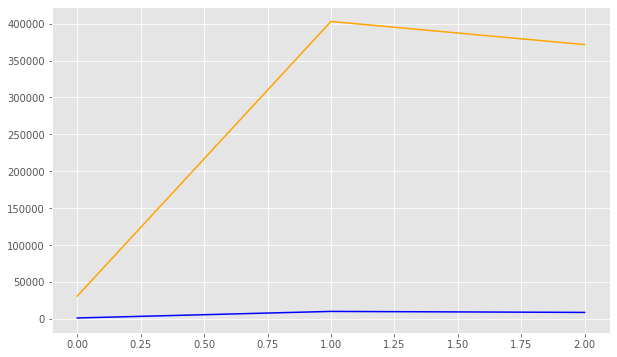

In [33]:
%matplotlib inline

plt.style.use('ggplot')

X = np.arange(len(Tahun))
y1 = np.array([30761,403094,371765])
y2 = np.array([1015,9919,8560])

fig, ax = plt.subplots(figsize=(10,6))

plt.plot(y1, color='orange')
plt.plot(y2, color='blue')

plt.show()

## Customer Rate

### Number of Customer

In [34]:
sum_cust = df_dataset['Invoice'].count()
sum_cust

1067371

In [35]:
scustomer = df_dataset.groupby('year')['Invoice'].count().reset_index()
scustomer

,year,Invoice
0,2009,45228
1,2010,522714
2,2011,499429


In [36]:
scustomer['rate'] = scustomer['Invoice']/sum_cust*100
scustomer[['year', 'Invoice', 'rate']].head()

,year,Invoice,rate
0,2009,45228,4.237327
1,2010,522714,48.972101
2,2011,499429,46.790572


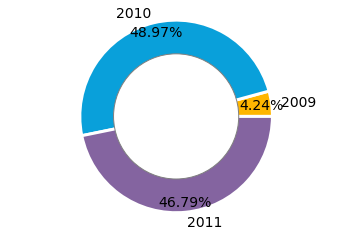

In [48]:
# The slices will be ordered and plotted counter-clockwise.
labels = df['year']
sizes = scustomer['rate']
colors = ['#FFB600', '#09A0DA','#8464a0']

# explode a slice if required
explode = (0, 0, 0) 
# Font size of text in donut chart
textprops = {'fontsize':14,'color':'black'}
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
# Show data in 0.00%
 autopct='%.2f%%', 
 pctdistance =0.9,
 shadow=False,
 textprops =textprops,
 wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},)
 
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.65,color='grey', fc='white',linewidth=1.00)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal') # Set aspect ratio to be equal so that pie is      drawn as a circle.
plt.show()

### Finished customer rate

In [37]:
fin_cust = Cust_notna.groupby('year')['Invoice'].count().reset_index()
fin_cust

,year,Invoice
0,2009,30761
1,2010,403094
2,2011,371765


In [39]:
fin_cust['rate'] = fin_cust['Invoice']/sum_cust*100
fin_cust[['year', 'Invoice', 'rate']].head()

,year,Invoice,rate
0,2009,30761,2.881941
1,2010,403094,37.765126
2,2011,371765,34.829970


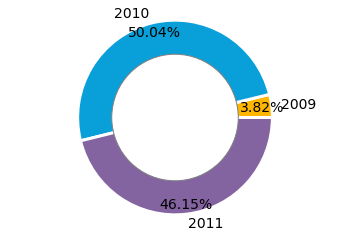

In [49]:
# The slices will be ordered and plotted counter-clockwise.
labels = df['year']
sizes = fin_cust['rate']
colors = ['#FFB600', '#09A0DA','#8464a0']

# explode a slice if required
explode = (0, 0, 0) 
# Font size of text in donut chart
textprops = {'fontsize':14,'color':'black'}
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
# Show data in 0.00%
 autopct='%.2f%%', 
 pctdistance =0.9,
 shadow=False,
 textprops =textprops,
 wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},)
 
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.65,color='grey', fc='white',linewidth=1.00)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal') # Set aspect ratio to be equal so that pie is      drawn as a circle.
plt.show()

### Canceled customer rate

In [41]:
cancel_cust = cancel.groupby('year')['Invoice'].count().reset_index()
cancel_cust

,year,Invoice
0,2009,1015
1,2010,9919
2,2011,8560


In [50]:
cancel_cust['rate'] = cancel_cust['Invoice']/sum_cust*100
cancel_cust[['year', 'Invoice', 'rate']].head()

,year,Invoice,rate
0,2009,1015,0.095093
1,2010,9919,0.929293
2,2011,8560,0.801970


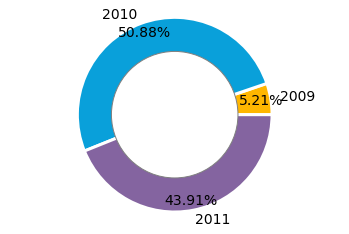

In [51]:
# The slices will be ordered and plotted counter-clockwise.
labels = df['year']
sizes = cancel_cust['rate']
colors = ['#FFB600', '#09A0DA','#8464a0']

# explode a slice if required
explode = (0, 0, 0) 
# Font size of text in donut chart
textprops = {'fontsize':14,'color':'black'}
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
# Show data in 0.00%
 autopct='%.2f%%', 
 pctdistance =0.9,
 shadow=False,
 textprops =textprops,
 wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},)
 
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.65,color='grey', fc='white',linewidth=1.00)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal') # Set aspect ratio to be equal so that pie is      drawn as a circle.
plt.show()

### Interpretation

Conclusion: The performance of online retail sales with the most transactions occurred in 2010 amounting to 48.97%, with successful transactions of 50.04% and failed transactions of 50.88%. whereas in the previous year, 2009 was only 4.24% with 3.82% successful transactions and 5.21% failed transactions. however in 2011 there was a decrease in transactions to 46.79%. with 46.15% of successful transactions and 43.91% of failed transactions. The percentage is taken from the total transactions that occurred in 2009 to 2011.